In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
from google.colab.patches import cv2_imshow

In [19]:
import cv2
import numpy as np

Face

In [26]:
#paths
image_path = "../content/faces.jpg"
haar_cascade_path = "../content/drive/MyDrive/xml/haarcascade_frontalface.xml"

In [59]:
input_image = cv2.imread(image_path)

In [29]:
type(input_image), input_image.shape

(numpy.ndarray, (1365, 2048, 3))

In [30]:
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

In [31]:
gray_image.shape

(1365, 2048)

In [32]:
#using cascade inside opencv
haarcascade = cv2.CascadeClassifier(haar_cascade_path)

In [33]:
type(haarcascade)

cv2.CascadeClassifier

In [60]:
detected_faces = haarcascade.detectMultiScale(gray_image,1.5,3)

In [35]:
type(detected_faces)

numpy.ndarray

In [61]:
for face in detected_faces:
  x,y,w,h = face
  cv2.rectangle(input_image,(x,y), (x+w, y+h), (0,255,255), 3)

In [ ]:
cv2_imshow(input_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [63]:
cv2.imwrite("exp_1.5_3.jpg",input_image)

True

Eyes

In [65]:
input_path = "../content/person_eyes.jpeg"

haar_cascade_eyes_path = "../content/drive/MyDrive/xml/haarcascade_eye.xml"

In [79]:
def detection_eyes(image_path, cascade_path):
  """
  paras:
  image: input image
  cascade: input cascade (eyes)

  return: numpy array (detection)

  """
  image = cv2.imread(image_path)

  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  haarcascade = cv2.CascadeClassifier(cascade_path)

  detection = haarcascade.detectMultiScale(gray_image,1.5,7)

  for box in detection:
    x,y,w,h = box
    cv2.rectangle(image, (x,y), (x+w, y+h),(0,0,255),3)

  cv2_imshow(image)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

  cv2.imwrite("exp_eyes_1.5_7.jpg",image)

  return detection


In [80]:
print(detection_eyes.__doc__)


  paras:
  image: input image
  cascade: input cascade (eyes)

  return: numpy array (detection)
  
  


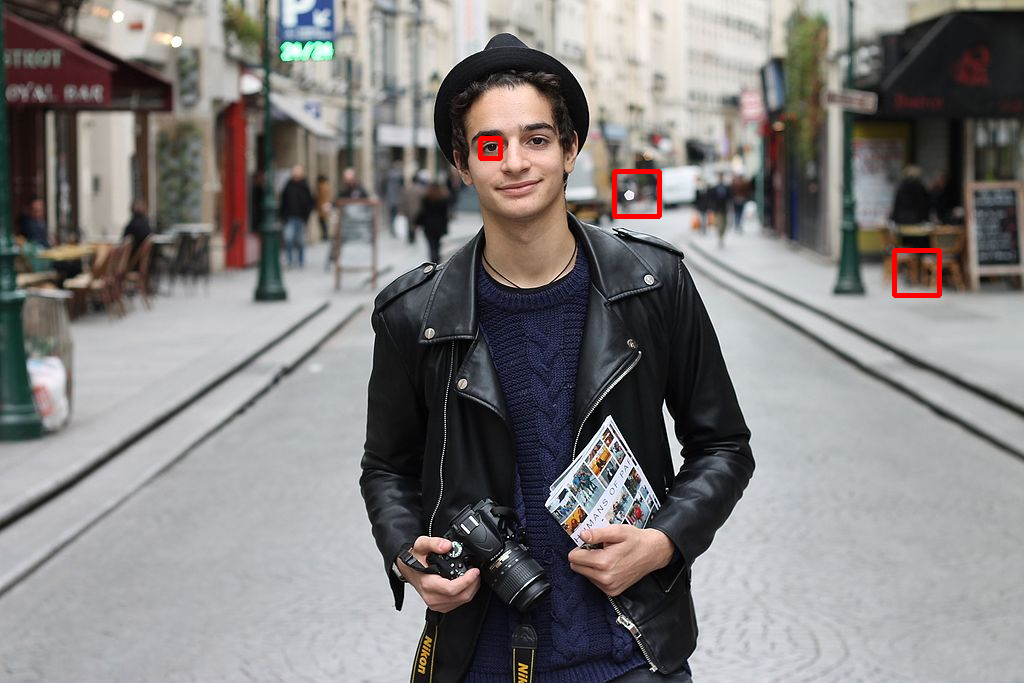

In [81]:
eye_detection = detection_eyes(input_path, haar_cascade_eyes_path)

face & Eyes detection

In [87]:
image_path = "../content/person_eyes.jpeg"
cascade_face_path = "../content/drive/MyDrive/xml/haarcascade_frontalface.xml"
cascade_eyes_path = "../content/drive/MyDrive/xml/haarcascade_eye.xml"


In [102]:
def detection_face_eyes(image_path, cascade_face_path, cascade_eyes_path):

  image = cv2.imread(image_path)

  copy = image.copy()

  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  haarcascade_face = cv2.CascadeClassifier(cascade_face_path)

  haarcascade_eyes = cv2.CascadeClassifier(cascade_eyes_path)

  detection_face = haarcascade_face.detectMultiScale(gray, 1.5, 8)

  #face
  for box in detection_face:
    x,y,w,h = box
    cv2.rectangle(image, (x,y), (x+w, y+h), (255,0,0),3)

    #crop face to detect eyes

    crop = gray[y:y+h, x:x+w]
    crop_copy = copy[y:y+h, x:x+w]
    cv2.imwrite("croped_face.jpg",crop_copy)

    detection_eyes = haarcascade_eyes.detectMultiScale(crop, 1.1, 2)

    #eyes
    for box in detection_eyes:
      X,Y,W,H = box # from eyes detctions
      cv2.rectangle(image, (x+X,y+Y), (x+X+W, y+Y+H), (0,0,255),3)

  #show & write face & eyes on RGB image (ORIGINAL)
  cv2_imshow(image)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

  cv2.imwrite("exp_face_eyes.jpg",image)

  return detection_face, detection_eyes


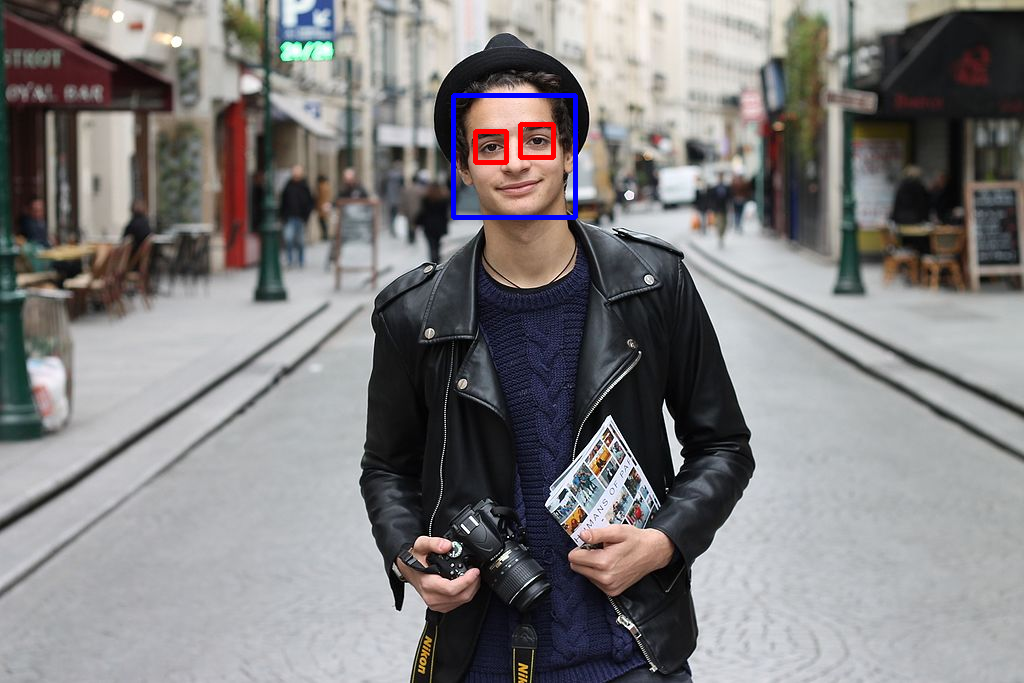

In [103]:
detection_face,detection_eyes = detection_face_eyes(image_path, cascade_face_path, cascade_eyes_path)

In [104]:
detection_face

array([[453,  95, 122, 122]], dtype=int32)

In [105]:
detection_eyes

array([[67, 29, 33, 33],
       [22, 36, 31, 31]], dtype=int32)

face & smile detection